In [2]:
import pickle

import numpy as np

from utils_plot.plot_likelihood_ratio_statistics import plot_likelihood_ratio_statistics
from utils_stats.likelihood_ratio_statistic_frequency import likelihood_ratio_statistic_frequency_haploid

In [3]:
k = 5
n = 400

In [4]:
bits = pickle.load(open("../data/test/In_Pop.pkl", "rb"))
d = []
for b in bits:
    d += [b.tolist()]
d = np.array(d, dtype=int)
bits = []

In [5]:
bits = pickle.load(open("../data/test/Not_In_Pop.pkl", "rb"))
d_n = []
for b in bits:
    d_n += [b.tolist()]
d_n = np.array(d_n, dtype=int)
bits = []

In [6]:
d = np.concatenate((d, d_n), axis=0)
d_n = []

In [7]:
np.random.seed(0)
inds = np.random.choice(np.arange(d.shape[0]), size=n, replace=False)
d_train = d[inds]
d_test = np.delete(d, inds, axis=0)
d = []

In [8]:
d = d_train
d_train = []
d_n = d_test
d_test = []
d_c = np.concatenate((d, d_n), axis=0)

In [9]:
freqs_d = np.clip(np.mean(d, axis=0), a_min=0.0001, a_max=0.9999)
freqs_n = np.clip(np.mean(d_n, axis=0), a_min=0.0001, a_max=0.9999)

In [13]:
delta = -((d*(np.log(freqs_n/freqs_d))) + ((1-d)*(np.log((1-freqs_n)/(1-freqs_d)))))
delta_test = d*(np.log(freqs_d/freqs_n)) + (1-d)*(np.log((1-freqs_d)/(1-freqs_n)))
assert np.allclose(delta, delta_test)
delta_n = -((d_n*(np.log(freqs_n/freqs_d))) + ((1-d_n)*(np.log((1-freqs_n)/(1-freqs_d)))))
delta_test_n = d_n*(np.log(freqs_d/freqs_n)) + (1-d_n)*(np.log((1-freqs_d)/(1-freqs_n)))
assert np.allclose(delta_n, delta_test_n)
eta = np.sum(-delta, axis=1)
eta_n = np.sum(-delta_n, axis=1)
eta_custom = []
eta_n_custom = []
for i in range(d.shape[0]):
    eta_custom += [likelihood_ratio_statistic_frequency_haploid(d[i], freqs_d, freqs_n)]
for i in range(d_n.shape[0]):
    eta_n_custom += [likelihood_ratio_statistic_frequency_haploid(d_n[i], freqs_d, freqs_n)]
eta_c = np.sum(-delta_c, axis=1)
eta_n_c = np.sum(-delta_n_c, axis=1)

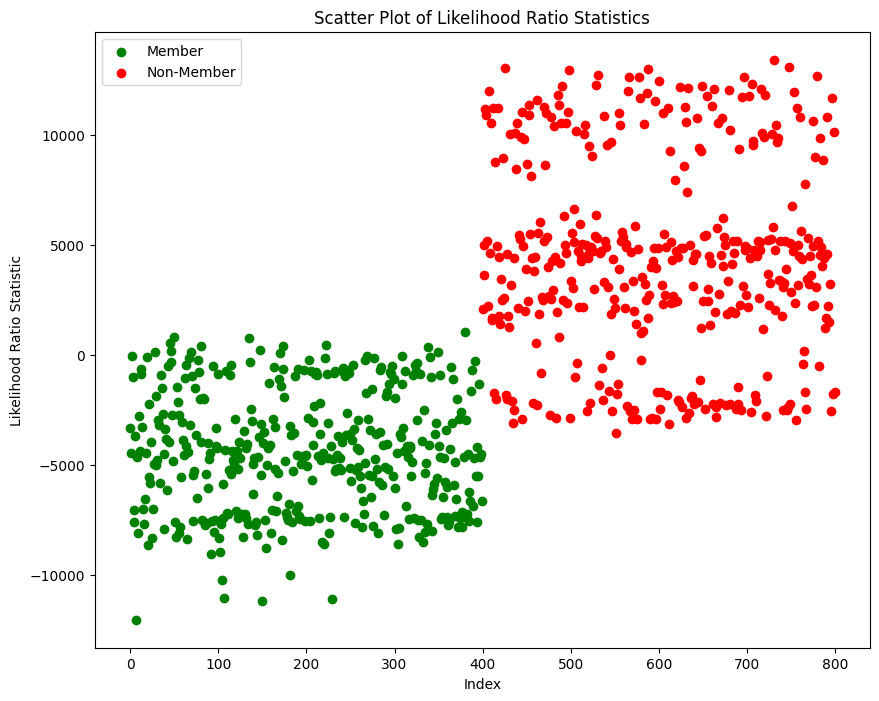

In [24]:
likelihood_ratio_statistics = np.concatenate((eta, eta_n), axis=0)
membership_labels = np.concatenate((np.ones(d.shape[0]), np.zeros(d_n.shape[0])), axis=0).astype(bool)
plot_likelihood_ratio_statistics(likelihood_ratio_statistics, membership_labels)

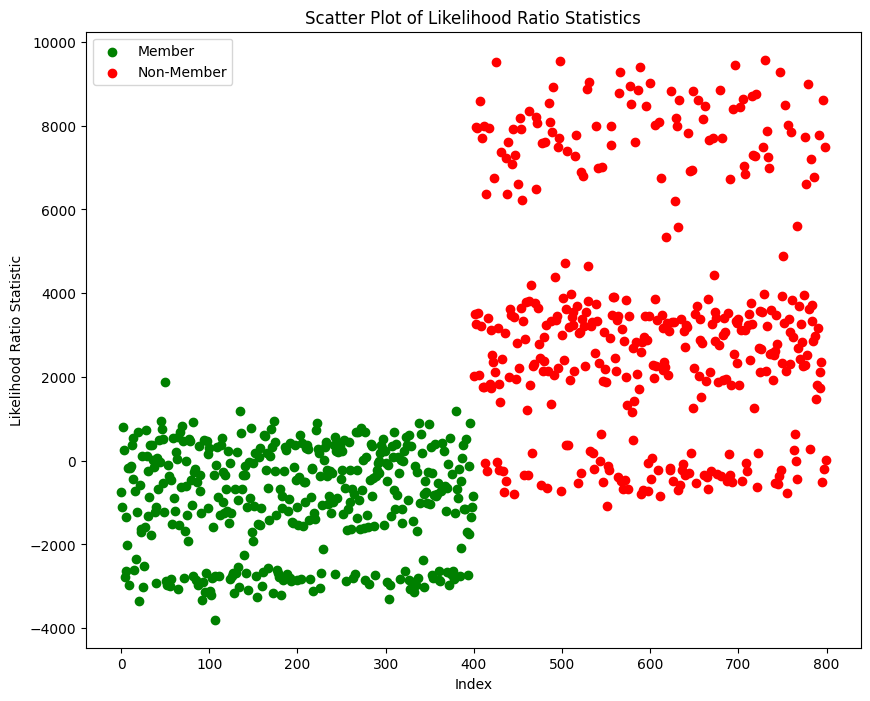

In [25]:
likelihood_ratio_statistics_c = np.concatenate((eta_c, eta_n_c), axis=0)
membership_labels_c = np.concatenate((np.ones(d.shape[0]), np.zeros(d_n.shape[0])), axis=0).astype(bool)
plot_likelihood_ratio_statistics(likelihood_ratio_statistics_c, membership_labels_c)